# TMDB Exploratory Analysis

In [83]:
#importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast
import datetime

In [98]:
#importing the dataset
movie_dataset = "TMDB_movies.csv"
df = pd.read_csv(movie_dataset)

In [315]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [316]:
dfn.shape

(4799, 21)

In [55]:
# having a look at the objects etc
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

# Counting Nulls

In [91]:
# counting nulls
null_df = df.isnull() # truth table
null_df.sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [7]:
# lets identify the amount of nulls and put them into a data frame 
# feel free to copy paste 

def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum() ## How many nulls in each column
    total_cnt = len(dataframe) ## Total entries in the dataframe
    null_vals = pd.DataFrame(null_vals,columns=['null']) ## Put the number of nulls in a single dataframe
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3) ## Round how many nulls are there, as %, of the df
    
    return null_vals.sort_values('percent', ascending=False)

In [36]:
null_vals(df)

,null,percent
homepage,3091,64.356
tagline,844,17.572
overview,3,0.062
runtime,2,0.042
release_date,1,0.021
budget,0,0.000
vote_average,0,0.000
title,0,0.000
status,0,0.000
spoken_languages,0,0.000


In [290]:
# # Specify columns to check for null values
# specified_columns = ['overview', 'runtime', 'release_date']

# # View rows with null values in specified columns
# rows_with_nulls = df[df[specified_columns].isnull().any(axis=1)]

# rows_with_nulls

In [289]:
# rows with nulls from three columns with v few nulls
rwn = df[df[['runtime', 'release_date', 'overview']].isnull().any(axis=1)]

rwn.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.000000,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


# Creating a copy of the dataframe to amend 

In [146]:
# Create a copy of the DataFrame to work on
dfn = df.copy()

In [147]:
dfn.shape

(4803, 20)

In [150]:
# dropping the the few null values -- 4 rows
 
dfn.dropna(
    axis = 0, # default
    how = 'any', # default
    subset = ['runtime', 'overview', 'release_date'],   # subset tells dropna which columns to consider
    inplace = True # makes change permanent
)

In [151]:
dfn.shape

(4799, 20)

## Extracting items as lists from the columns with lists of dictionaries

Several of our columns, including Genres, Production Countries, Production Companies, Spoken Languages and Keywords are lists of dictionaries. I extract the content from the dictionaries to create lists here so that the data can be more easily manipulated. 


### Genres

In [144]:
print(df.genres[0]) ## It's a list of dictionaries

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]


In [153]:
# using the library ast to turn the list of dictionaries given in 'genre' into a list

def extract_genres(movie):
    ''' Take a single movie's genres and make them into a comma separated string '''
    movie = ast.literal_eval(movie) ## make sure it's a list!
    
    genres = [x['name'] for x in movie] ##  list comprehension that iterates over each element x in the movie list, 
    

    return genres ## return a list 

## For each x, it retrieves the value associated with the key 'name' 
## from the dictionary x and adds it to a new list called genres.


In [154]:
# Apply the function to column 'genres'
dfn['genres'] = dfn['genres'].apply(extract_genres)

### Keywords

In [156]:
# using the library ast to turn the list of dictionaries given in 'keywords' into a list

def extract_keywords(movie):
    ''' Take a single movie's genres and make them into a comma separated string '''
    movie = ast.literal_eval(movie) ## make sure it's a list!
    
    keywords = [x['name'] for x in movie] ##  list comprehension that iterates over each element x in the movie list, 
    
    return keywords 

In [157]:
# Apply the function to column 'keywords'
dfn['keywords'] = dfn['keywords'].apply(extract_keywords)

### Production Companies

In [73]:
print(df.production_companies[0]) 

[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]


In [159]:
# extract production companies into lists

def extract_production_companies(movie):
    ''' Take a single movie's genres and make them into a comma separated string '''
    movie = ast.literal_eval(movie) ## make sure it's a list!
    
    production_companies = [x['name'] for x in movie] ##  list comprehension that iterates over each element x in the movie list, 
    
    
    return production_companies

In [162]:
# Apply the function to column 'production_companies'
dfn['production_companies'] = dfn['production_companies'].apply(extract_production_companies)

### Production Countries

In [164]:
# extract production countries into lists

def extract_production_countries(movie):
    ''' Take a single movie's genres and make them into a comma separated string '''
    movie = ast.literal_eval(movie) ## make sure it's a list!
    
    production_countries = [x['name'] for x in movie] ##  list comprehension that iterates over each element x in the movie list, 
    
    return production_countries 

In [165]:
# Apply the function to column production_countries
dfn['production_countries'] = dfn['production_countries'].apply(extract_production_countries)

### Spoken Languages

In [167]:
# # extract spoken languages into lists

def extract_spoken_languages(movie):
    ''' Take a single movie's genres and make them into a comma separated string '''
    movie = ast.literal_eval(movie) ## make sure it's a list!
    
    spoken_languages = [x['name'] for x in movie] ##  list comprehension that iterates over each element x in the movie list, 
    
    return spoken_languages 

In [168]:
# Apply the function to column spoken langauges
dfn['spoken_languages'] = dfn['spoken_languages'].apply(extract_spoken_languages)

### Converting date column format

In [308]:
# Converting the date column to a datetime format

dfn['release_date'] = pd.to_datetime(dfn['release_date'])

In [309]:
dfn.info() # the dtype has changed

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4799 non-null   int64         
 1   genres                4799 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4799 non-null   int64         
 4   keywords              4799 non-null   object        
 5   original_language     4799 non-null   object        
 6   original_title        4799 non-null   object        
 7   overview              4799 non-null   object        
 8   popularity            4799 non-null   float64       
 9   production_companies  4799 non-null   object        
 10  production_countries  4799 non-null   object        
 11  release_date          4799 non-null   datetime64[ns]
 12  revenue               4799 non-null   int64         
 13  runtime               4

# Graphs

## Heatmap of Correlations

Text(0.5, 1.0, 'Heatmap of Correlations')

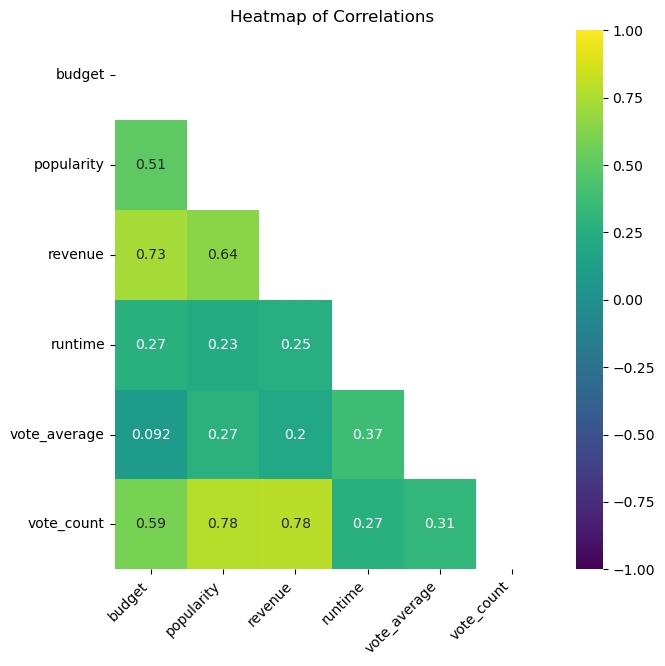

In [320]:
## Heatmap to show correlations 

heatmap = dfn[['budget','popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']].copy()

plt.figure(figsize = (7,7))

sns.heatmap(heatmap.corr(numeric_only = True),
            annot=True,
           mask = np.triu(heatmap.corr(numeric_only=True)),
           cmap = 'viridis',
           robust=1,
           vmin=-1, vmax=1)

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='medium'
           )

plt.yticks(rotation=90,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='medium'
           )

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.yticks(rotation=0) 

plt.title('Heatmap of Correlations')


We can see there is a correlation between revenue and budget, i.e., the higher the budget for the film being made, the higher the revenue it's likely to make. This is not very suprising: a film with a large production budget is likely to be both higher quality and also have more budget set aside for marketing. 

There is also a correlation between vote_count and popularity and vote_count and revenue: this is also not wholly unexpected, as vote_count is indicative of the number of people who have seeen a film, and the more people who have seen a film the higher the revenue is likely to be. 

## Graph of Genre vs Mean Revenue

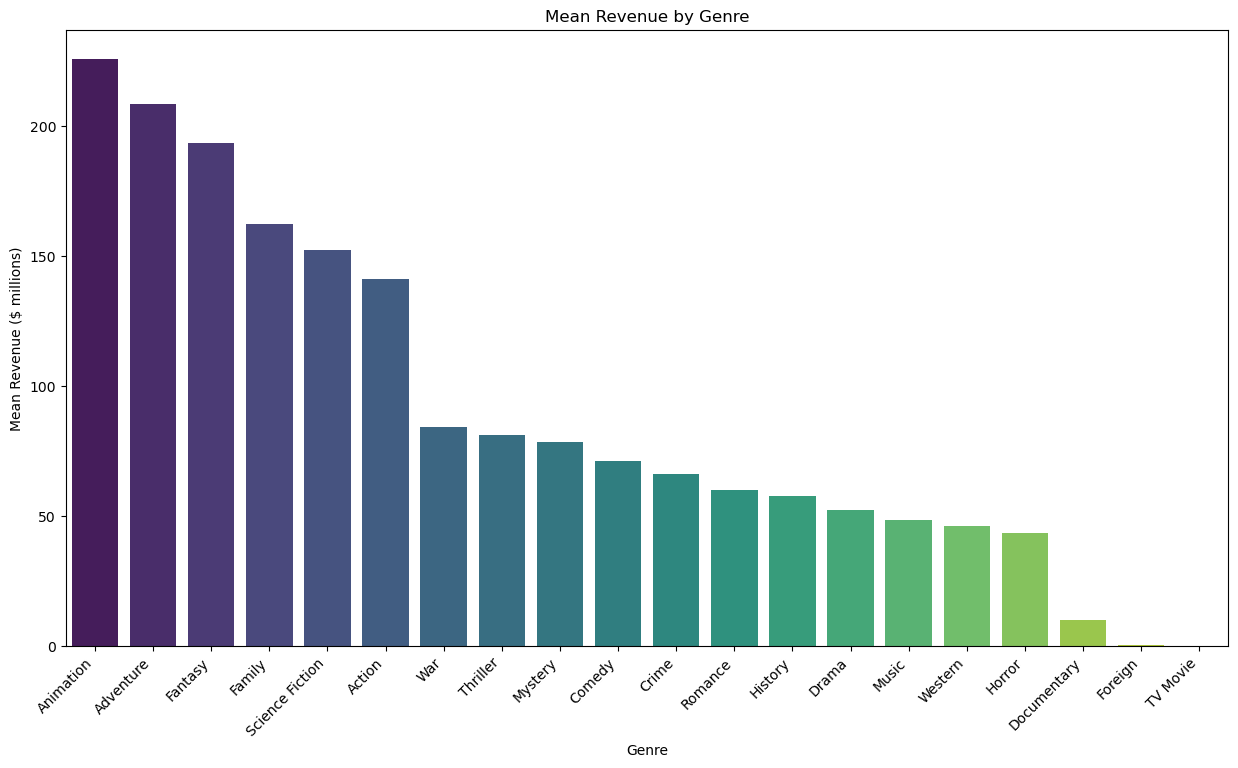

In [187]:
### Graph of genres and mean revenue

# Extract the relevant columns
plot_genres_revenue = dfn[['genres', 'revenue']].copy()

# Explode the 'genres' column to have one row for each genre
exploded_dfn = plot_genres_revenue.explode('genres')

# Group the data by 'genre' and calculate the mean revenue for each genre
mean_revenue_by_genre = exploded_dfn.groupby('genres')['revenue'].mean().reset_index()

# Change units to millions of USD
mean_revenue_by_genre['revenue'] = mean_revenue_by_genre['revenue']/1e6

# Sort the genres by mean revenue
mean_revenue_by_genre = mean_revenue_by_genre.sort_values(by='revenue', ascending=False)

# Plot the data
plt.figure(figsize=(15, 8))
sns.barplot(x='genres', y='revenue', data= mean_revenue_by_genre, palette='viridis')
plt.title('Mean Revenue by Genre')
plt.ylabel('Mean Revenue ($ millions)')
plt.xlabel('Genre')

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='medium'
           )

plt.show()

## Total Revenue by Genre

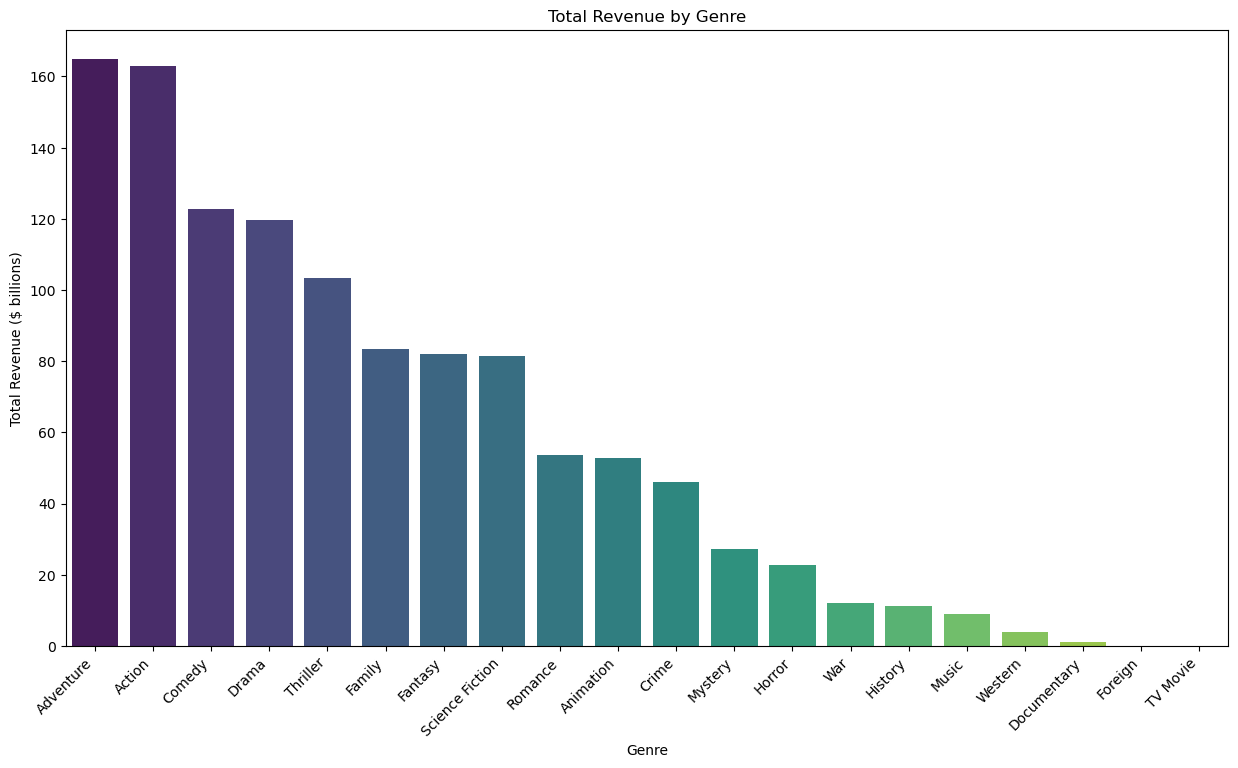

In [321]:
#### Total revenue by genre

# Extract the relevant columns
sum_genres_revenue = dfn[['genres', 'revenue']].copy()

# Explode the 'genre_list' column to have one row for each genre
exploded_dfn = sum_genres_revenue.explode('genres')

# Group the data by 'genre_list' and calculate the mean revenue for each genre
tot_revenue_by_genre = exploded_dfn.groupby('genres')['revenue'].sum().reset_index()

# Change units to millions of USD
tot_revenue_by_genre['revenue'] = tot_revenue_by_genre['revenue']/1e9

# Sort the genres by mean revenue
tot_revenue_by_genre = tot_revenue_by_genre.sort_values(by='revenue', ascending=False)

# Plot the data
plt.figure(figsize=(15, 8))
sns.barplot(x='genres', y='revenue', data= tot_revenue_by_genre, palette='viridis')
plt.title('Total Revenue by Genre')
plt.ylabel('Total Revenue ($ billions)')
plt.xlabel('Genre')

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='medium'
           )

plt.show()

### Comparison of Total Revenue by Genre and Mean Revenue by Genre

We can see that the Animation genre is the highest performing by mean revenue, but drops in the rankings of total revenue, suggesting that although animated films generally do well in terms of revenue, they are not produced at as great a volume as, e.g., Adventure and Action films, which place quite highly in both aggregate measurements. 

## Production Company vs Mean Revenue

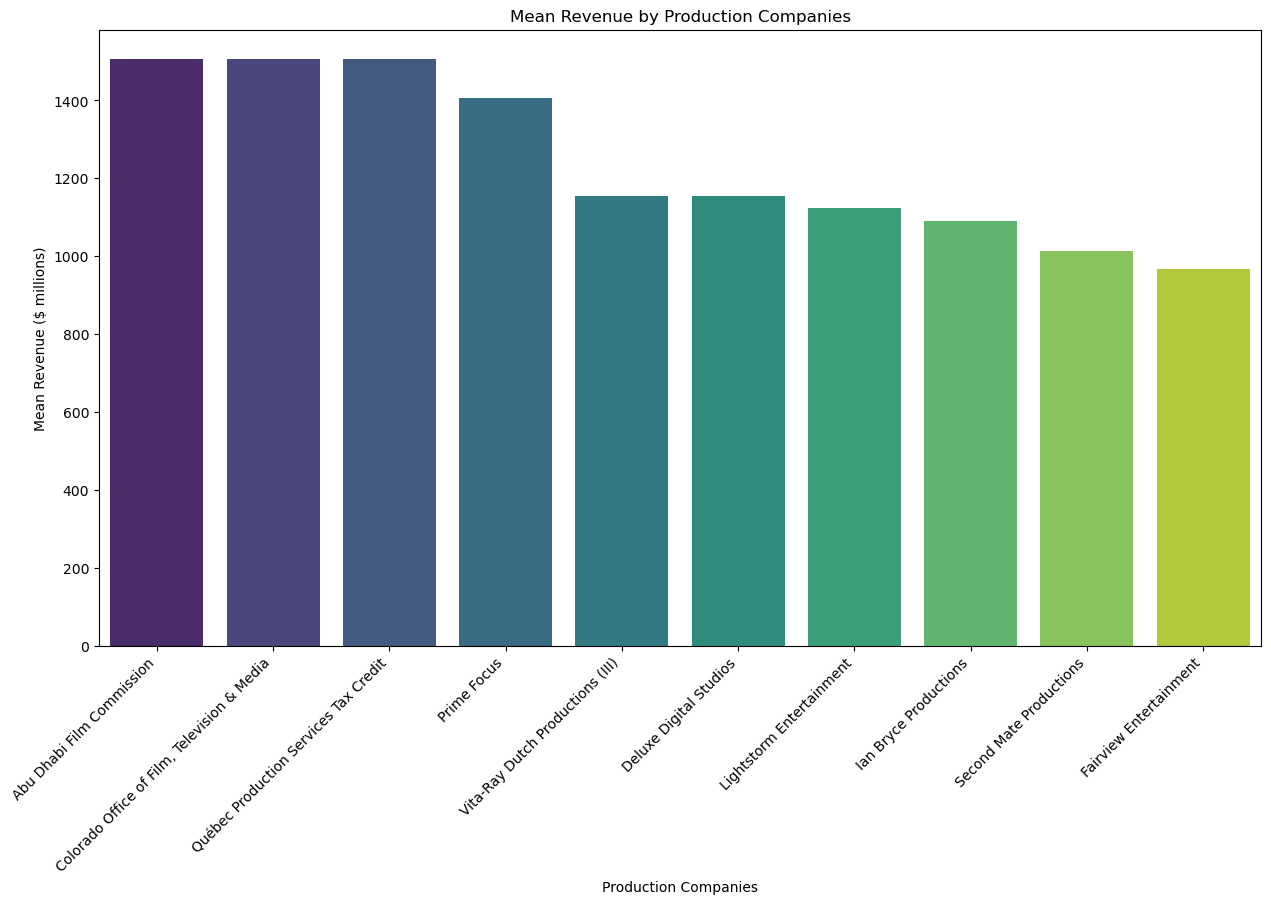

In [194]:
### Graph of production company and mean revenue

# Extract the relevant columns
plot_comp_revenue = dfn[['production_companies', 'revenue']].copy()

# Explode the 'production_companies' column to have one row for each genre
exploded_dfn = plot_comp_revenue.explode('production_companies')

# Group the data by 'production_companies' and calculate the mean revenue for each 
mean_revenue_pc = exploded_dfn.groupby('production_companies')['revenue'].mean().reset_index()


# Change units to millions of USD
mean_revenue_pc['revenue'] = mean_revenue_pc['revenue']/1e6

# Sort the companies by mean revenue
mean_revenue_pc = mean_revenue_pc.sort_values(by='revenue', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(15, 8))
sns.barplot(x='production_companies', y='revenue', 
            data= mean_revenue_pc, 
            palette='viridis')

plt.title('Mean Revenue by Production Companies')
plt.ylabel('Mean Revenue ($ millions)')
plt.xlabel('Production Companies')

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='medium'
           )

plt.show()


## Production Country and Mean Revenue

Looking at the top 10 production countries by mean revenue per country. 

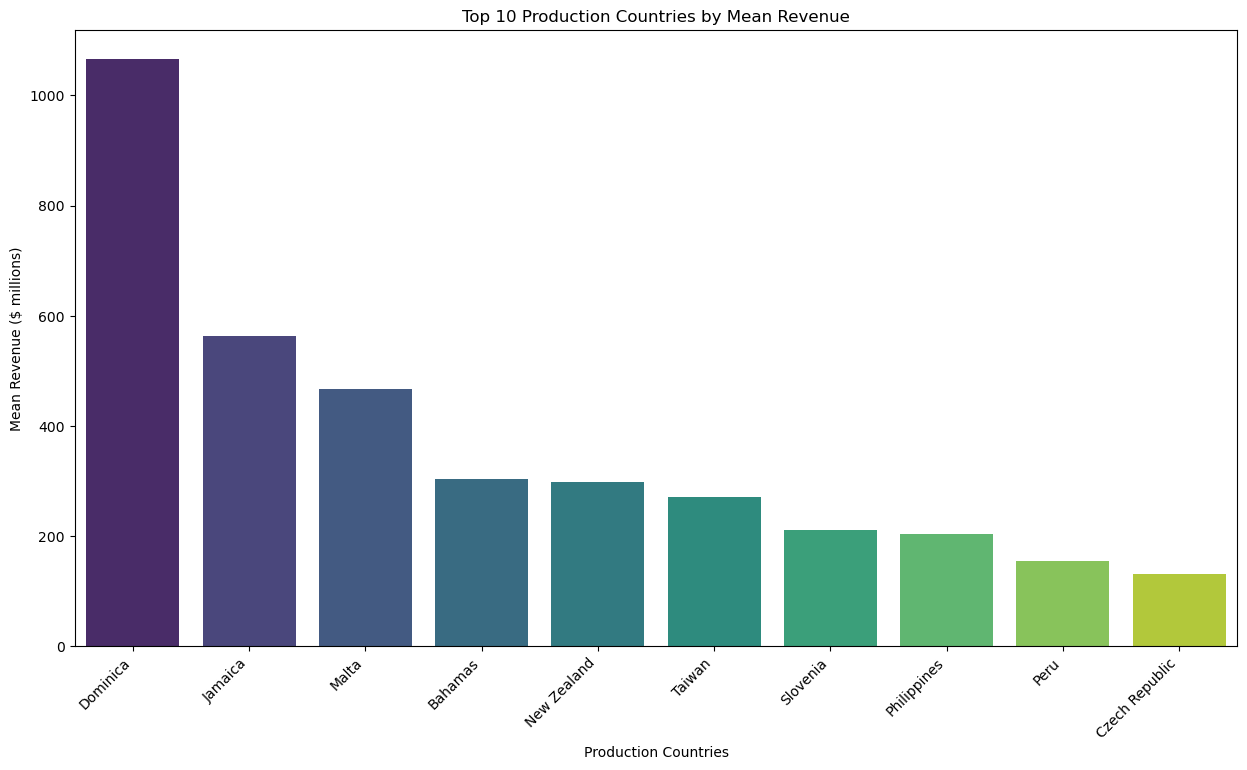

In [313]:
### Graph of production country and mean revenue

# Extract the relevant columns
plot_countr_revenue = dfn[['production_countries', 'revenue']].copy()

# Explode the 'production_countries' column to have one row for each 
exploded_dfn = plot_countr_revenue.explode('production_countries')

# Group the data by 'production_countries' and calculate the mean revenue for each
mean_revenue_pc2 = exploded_dfn.groupby('production_countries')['revenue'].mean().reset_index()

# Change units to millions of USD
mean_revenue_pc2['revenue'] = mean_revenue_pc2['revenue']/1e6

# Sort the countries by mean revenue
mean_revenue_pc2 = mean_revenue_pc2.sort_values(by='revenue', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(15, 8))
sns.barplot(x='production_countries', y='revenue', 
            data= mean_revenue_pc2, 
            palette='viridis')

plt.title('Top 10 Production Countries by Mean Revenue')
plt.ylabel('Mean Revenue ($ millions)')
plt.xlabel('Production Countries')

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='medium'
           )

plt.show()

Surprising finding: I did not expect to find the countries with the top average revenue to be such small countries, and not particularly well-known for their film-making. 

## Production Country and Total Revenues

Looking at the top 10 production countries by total revenue for the country. 

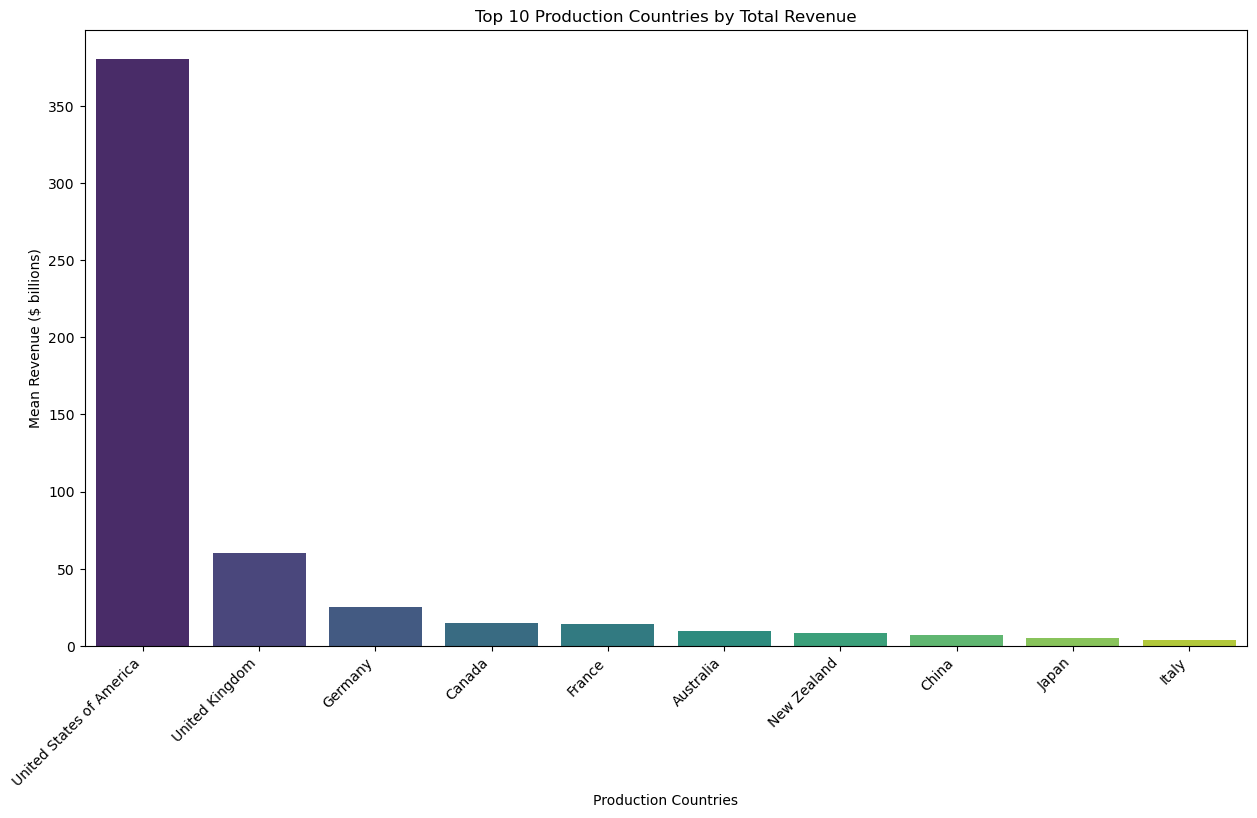

In [312]:
### Graph of production country and total revenue

# Extract the relevant columns
plot_countr_revenue = dfn[['production_countries', 'revenue']].copy()

# Explode the 'production_countries' column to have one row for each 
exploded_dfn = plot_countr_revenue.explode('production_countries')

# Group the data by 'production_countries' and calculate the total revenue for each 
tot_revenue_pc2 = exploded_dfn.groupby('production_countries')['revenue'].sum().reset_index()


# Change units to millions of USD
tot_revenue_pc2['revenue'] = tot_revenue_pc2['revenue']/1e9

# Sort the production_countries by total revenue
tot_revenue_pc2 = tot_revenue_pc2.sort_values(by='revenue', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(15, 8))
sns.barplot(x='production_countries', y='revenue', 
            data= tot_revenue_pc2, 
            palette='viridis')

plt.title('Top 10 Production Countries by Total Revenue')
plt.ylabel('Mean Revenue ($ billions)')
plt.xlabel('Production Countries')

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='medium'
           )

plt.show()

Less surprising finding: I would expect the United States to be at the top of the production countries as it has a huge amount of movie business. 

# Keypoint 1: Difference between top-performing production countries by mean revenue vs. total revenue

We can see from the two graphs above, Top 10 Production Countries by Total Revenue and Top 10 Production Countries by Mean Revenue, that there is a big difference in performance based on which aggregate you choose to look at, and there is hardly any overlap: New Zealand is the only country that appears on both graphs.

So New Zealand has a large enough film industry to have a significant total revenue on an international scale, but also on average produces films that perform well at the box office. 

Whereas the United states utterly dominates in terms of total revenue, but must produce enough poorly-performing films as well as highly-grossing ones that it doesn't rate highly in terms of average revenue per film.  

## Top 10 Movies by Revenue

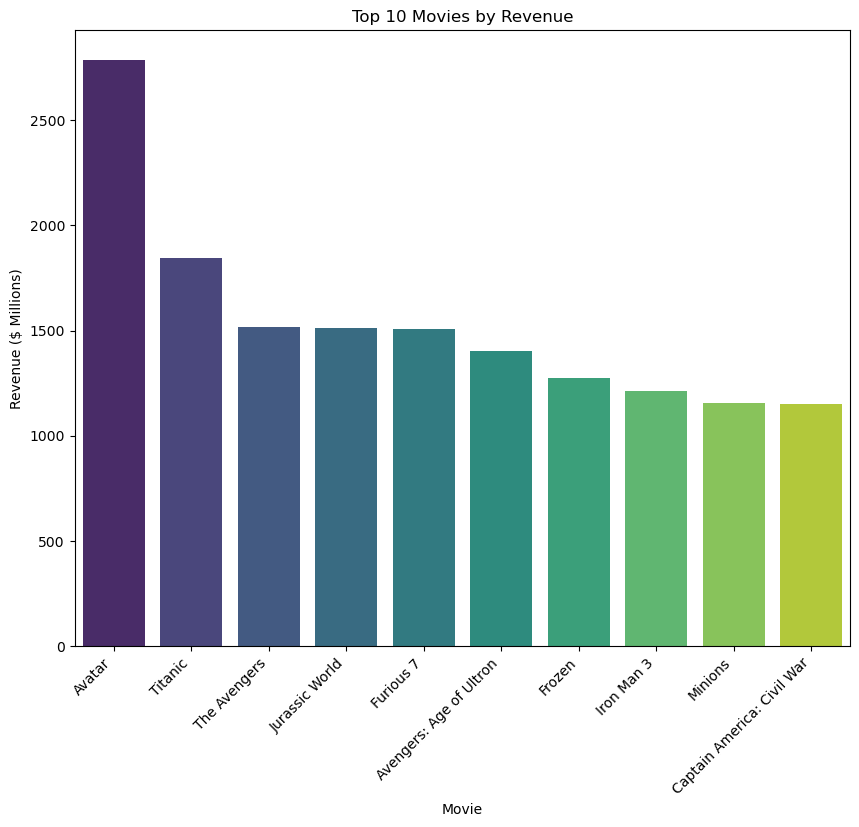

In [208]:
### Top 10 Movies by Revenue

revenues = df[['title','revenue']].copy()
revenues['revenue'] = revenues['revenue'] / 1e6

top_10_revenue = revenues[['title','revenue']].sort_values('revenue', ascending = False).head(10).copy()

plt.figure(figsize=(10, 8))

sns.barplot(x = 'title', ## column names
            y = 'revenue', ## bar height
            data = top_10_revenue,
            palette = 'viridis') ## data_frame! 

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='medium'
           )

plt.title('Top 10 Movies by Revenue')
plt.xlabel('Movie')
plt.ylabel('Revenue ($ Millions)')
plt.ylim(0,)

# plt.xlim()


plt.show() 


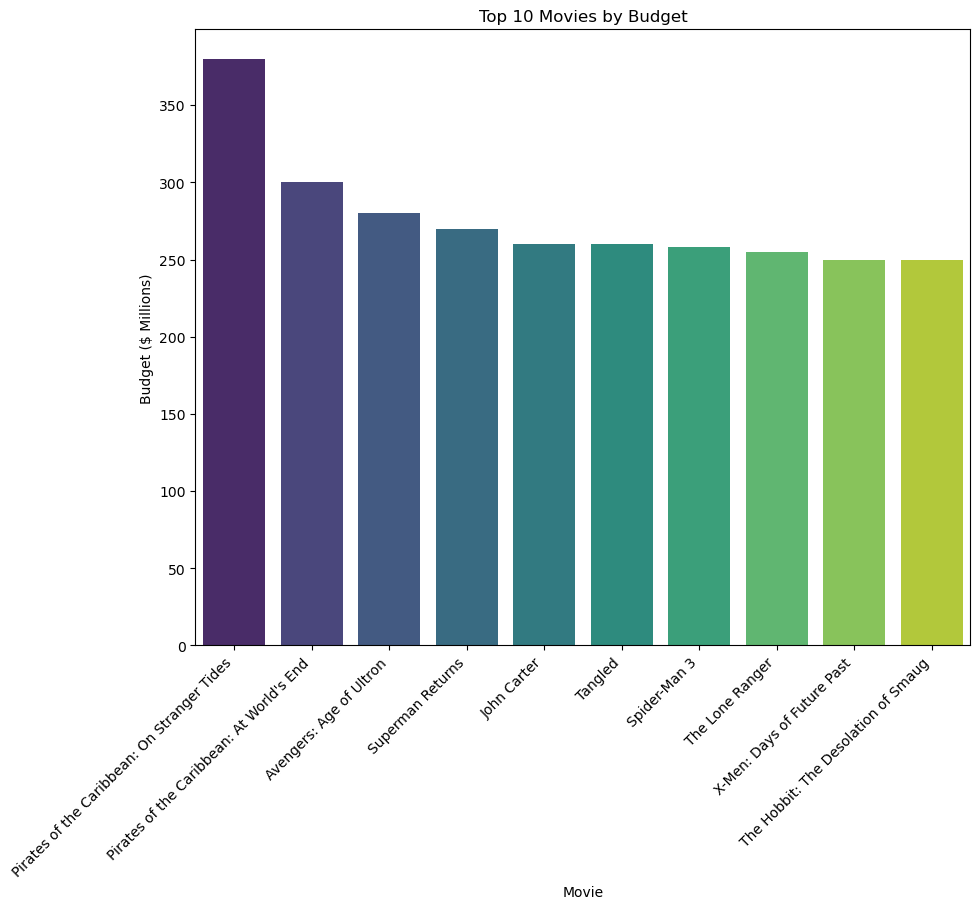

In [140]:
#### Top 10 Movies by Budget

budget = df[['title','budget']].copy()
budget['budget'] = budget['budget'] / 1e6

top_10_budget = budget[['title','budget']].sort_values('budget', ascending = False).head(10).copy()

plt.figure(figsize=(10, 8))
sns.barplot(x = 'title', ## column names
            y = 'budget', ## bar height
            data = top_10_budget,
            palette = 'viridis') ## data_frame! 

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='medium'
           )

plt.title('Top 10 Movies by Budget')
plt.xlabel('Movie')
plt.ylabel('Budget ($ Millions)')

# plt.xlim()
# plt.ylim()


plt.show() 




## Keypoint 2: Very few films directed by women in this dataset

As seen below in the code for counting occurrences of keywords, the most frequently occuring keyword is "woman director", occurring 324 times in in a dataset of about 4800 films, i.e., only in 7% of entries. 

Τhis tells us two significant things, firstly that there is not much overlap in the frequency of keywords applied to films, as the most common keyword 'woman director' appears in less than 10% of the entries. 

And secondly, assuming that the keyword tags are accurate, this shows that women make up an extremely small proportion of directors of films in this dataset. Unfortunately this is not all that surprising, it is well known that women are underrepresented in film direction, especially in big-budget films, therefore this finding accords with what I would expect to see. 

### Counting Occurrences of Keywords

In [229]:
#### Count occurrences of keywords

# Explode the lists into separate rows
keywords_exploded = dfn.explode('keywords')

# Count the instances of each value
value_counts = keywords_exploded['keywords'].value_counts().head(20)

print(value_counts)

keywords
woman director          324
independent film        318
duringcreditsstinger    307
based on novel          197
murder                  189
aftercreditsstinger     170
violence                150
dystopia                139
sport                   126
revenge                 118
sex                     111
friendship              106
musical                 105
biography               104
teenager                 99
3d                       98
love                     95
sequel                   94
suspense                 92
new york                 89
Name: count, dtype: int64


# Comparison of two movies: most and least profitable:


### Avatar

Avatar (2009) is the film which made the _most_ profit, over two billion dollars: $2,550,965,087.

In [299]:
## Location of film that made the maximum profit

dfn.loc[(dfn["revenue"] - dfn["budget"]) == (dfn["revenue"] - dfn["budget"]).max()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087


In [301]:
## Profit made: 2550965087

(dfn["revenue"] - dfn["budget"]).max()

2550965087

### The Lone Ranger

The Lone Ranger (2013) is the film that made the _least_ profit, a more than 160 million dollar loss: -$165,710,090.

In [243]:
## Location of film that made the minimum profit 

dfn.loc[(dfn["revenue"] - dfn["budget"]) == (dfn["revenue"] - dfn["budget"]).min()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
13,255000000,"[Action, Adventure, Western]",http://disney.go.com/the-lone-ranger/,57201,"[texas, horse, survivor, texas ranger, partner...",en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,49.046956,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2013-07-03,89289910,149.0,[English],Released,Never Take Off the Mask,The Lone Ranger,5.9,2311


In [246]:
## Profit made

(dfn["revenue"] - dfn["budget"]).min()

-165710090

# Analysis of Profit

In [248]:
# Define a function to get Profit
def profit(movie):
    
    return movie['revenue'] - movie['budget']

# Apply the function to create a new column 'profit'
dfn['profit'] = dfn.apply(lambda movie: profit(movie), axis=1)

In [249]:
dfn.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'profit'],
      dtype='object')

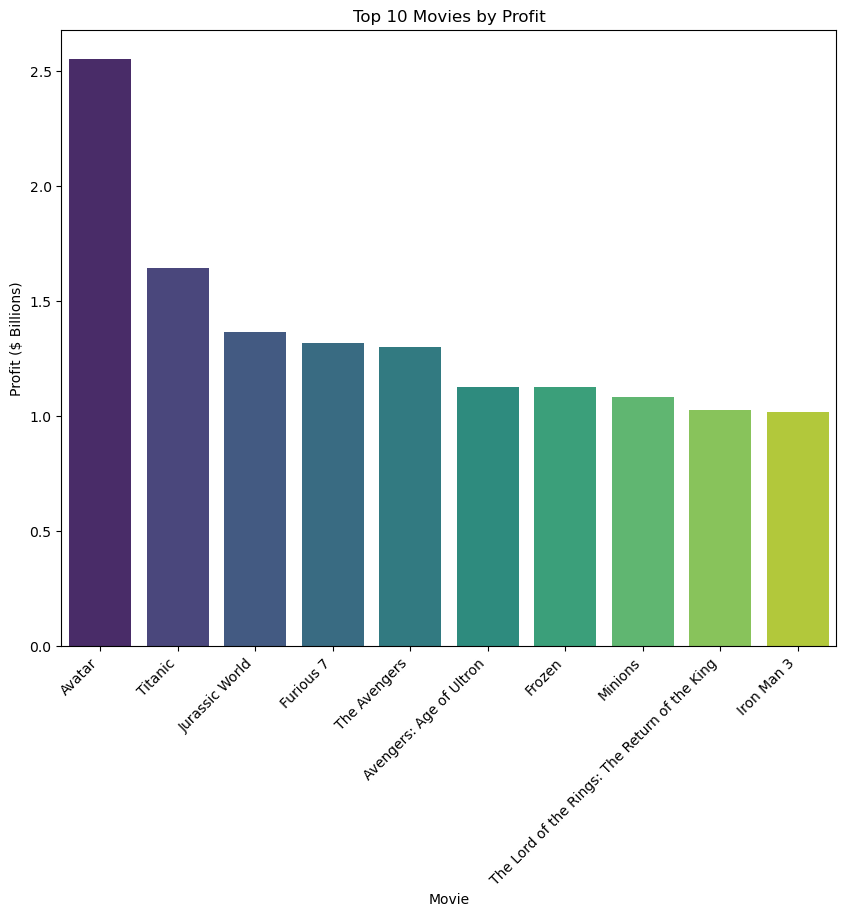

In [322]:
#### Top 10 Movies by Profit

profit = dfn[['title','profit']].copy()
profit['profit'] = profit['profit'] / 1e9

top_10_profit = profit[['title','profit']].sort_values('profit', ascending = False).head(10).copy()

plt.figure(figsize=(10, 8))
sns.barplot(x = 'title', ## column names
            y = 'profit', ## bar height
            data = top_10_profit,
            palette = 'viridis') ## data_frame! 

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='medium'
           )

plt.title('Top 10 Movies by Profit')
plt.xlabel('Movie')
plt.ylabel('Profit ($ Billions)')

# plt.xlim()
# plt.ylim()


plt.show() 


Finding: The top 10 movies by profit are extremely similar to the top 10 movies by revenue (a graph of which is above). 9 out of the 10 films are the same. This suggests the revenue made by top-performing films is so large that differences in budget generally do not make much of a difference to the profit made by the films.

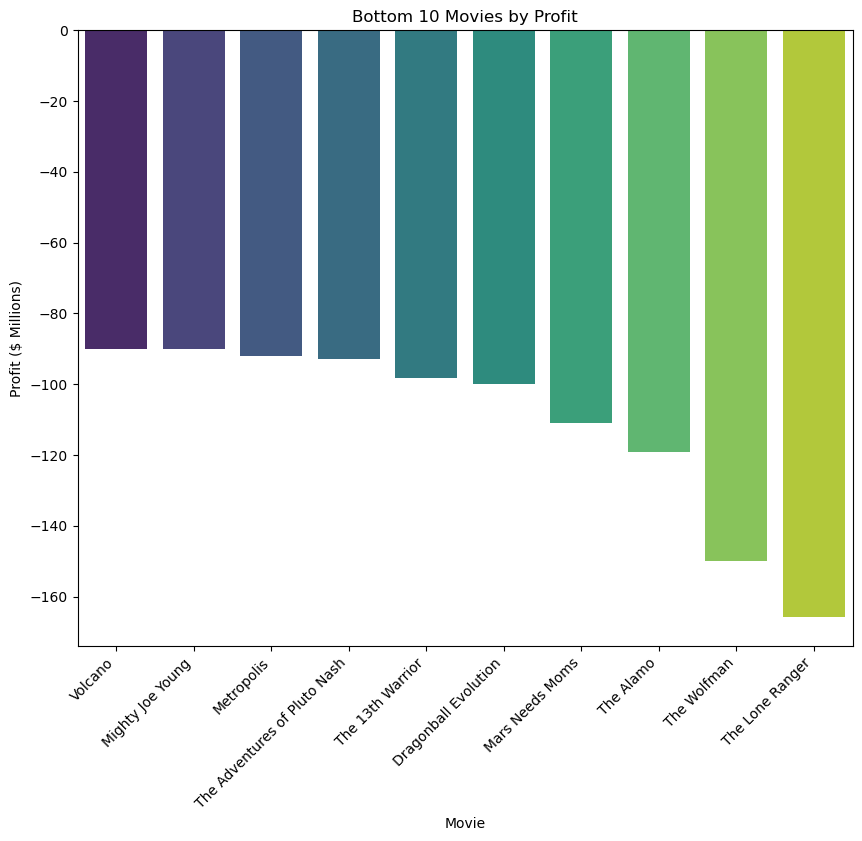

In [323]:
#### Bottom 10 Movies by Profit

profit = dfn[['title','profit']].copy()
profit['profit'] = profit['profit'] / 1e6

top_10_profit = profit[['title','profit']].sort_values('profit', ascending = False).tail(10).copy()

plt.figure(figsize=(10, 8))
sns.barplot(x = 'title', ## column names
            y = 'profit', ## bar height
            data = top_10_profit,
            palette = 'viridis') ## data_frame! 

plt.xticks(rotation=45,
           horizontalalignment='right',
           fontweight ='light',
           fontsize ='medium'
           )

plt.title('Bottom 10 Movies by Profit')
plt.xlabel('Movie')
plt.ylabel('Profit ($ Millions)')

# plt.xlim()
# plt.ylim()


plt.show() 


Finding: The worst performing films by profit are relatively unknown (especially compared to the top-performing films by profit), which makes sense for films that make relatively little revenue.

In [267]:
sorted_dfn = dfn.sort_values(by='profit', ascending = False)

In [275]:
top_5_profit = sorted_dfn.head(5)

In [281]:
top_5_profit.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit
count,5.000000e+00,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000e+00
mean,1.994000e+08,69735.200000,183.188576,1.834467e+09,152.000000,7.180000,8795.200000,1.635067e+09
std,3.304240e+07,76363.164734,133.695988,5.520793e+08,27.175356,0.396232,3193.333869,5.307807e+08
min,1.500000e+08,597.000000,100.025899,1.506249e+09,124.000000,6.500000,4176.000000,1.299558e+09
25%,1.900000e+08,19995.000000,102.322217,1.513529e+09,137.000000,7.200000,7562.000000,1.316249e+09
50%,2.000000e+08,24428.000000,144.448633,1.519558e+09,143.000000,7.300000,8662.000000,1.363529e+09
75%,2.200000e+08,135397.000000,150.437577,1.845034e+09,162.000000,7.400000,11776.000000,1.645034e+09
max,2.370000e+08,168259.000000,418.708552,2.787965e+09,194.000000,7.500000,11800.000000,2.550965e+09


In [317]:
top_5_profit

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",...,2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
25,200000000,"[Drama, Romance, Thriller]",http://www.titanicmovie.com,597,"[shipwreck, iceberg, ship, panic, titanic, oce...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[Paramount Pictures, Twentieth Century Fox Fil...",...,1997-11-18,1845034188,194.0,"[English, Français, Deutsch, svenska, Italiano...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562,1645034188
28,150000000,"[Action, Adventure, Science Fiction, Thriller]",http://www.jurassicworld.com/,135397,"[monster, dna, tyrannosaurus rex, velociraptor...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[Universal Studios, Amblin Entertainment, Lege...",...,2015-06-09,1513528810,124.0,[English],Released,The park is open.,Jurassic World,6.5,8662,1363528810
44,190000000,[Action],http://www.furious7.com/,168259,"[car race, speed, revenge, suspense, car, race...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[Universal Pictures, Original Film, Fuji Telev...",...,2015-04-01,1506249360,137.0,[English],Released,Vengeance Hits Home,Furious 7,7.3,4176,1316249360
16,220000000,"[Science Fiction, Action, Adventure]",http://marvel.com/avengers_movie/,24428,"[new york, shield, marvel comic, superhero, ba...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[Paramount Pictures, Marvel Studios]",...,2012-04-25,1519557910,143.0,[English],Released,Some assembly required.,The Avengers,7.4,11776,1299557910


In [277]:
 = sorted_dfn.tail(5)

In [278]:
top_5_profit.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit
count,5.000000e+00,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.00000,5.000000e+00
mean,1.600000e+08,28079.400000,22.992460,3.082053e+07,112.200000,5.120000,725.40000,-1.291795e+08
std,5.711830e+07,23671.494404,15.401289,3.677727e+07,29.149614,1.253794,904.90016,2.761178e+07
min,1.000000e+08,7978.000000,10.660441,0.000000e+00,85.000000,2.900000,106.00000,-1.657101e+08
25%,1.450000e+08,10733.000000,12.362599,0.000000e+00,88.000000,5.500000,199.00000,-1.500000e+08
50%,1.500000e+08,14164.000000,21.214571,2.581996e+07,102.000000,5.500000,462.00000,-1.191800e+08
75%,1.500000e+08,50321.000000,21.677732,3.899276e+07,137.000000,5.800000,549.00000,-1.110072e+08
max,2.550000e+08,57201.000000,49.046956,8.928991e+07,149.000000,5.900000,2311.00000,-1.000000e+08


In [280]:
bottom_5_profit

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
1652,100000000,"[Action, Adventure, Fantasy, Science Fiction, ...",NaN,14164,"[karate, superhero, revenge, dragon, duringcre...",en,Dragonball Evolution,The young warrior Son Goku sets out on a quest...,21.677732,"[Ingenious Film Partners, Twentieth Century Fo...",...,2009-04-01,0,85.0,"[English, 日本語, हिन्दी]",Released,The legend comes to life.,Dragonball Evolution,2.9,462,-100000000
141,150000000,"[Adventure, Animation, Family]",http://disney.go.com/disneypictures/marsneedsm...,50321,"[boy, alien, rescue, martian, alien abduction,...",en,Mars Needs Moms,"When Martians suddenly abduct his mom, mischie...",12.362599,[Walt Disney Animation Studios],...,2011-03-09,38992758,88.0,[English],Released,Mom needs a little space.,Mars Needs Moms,5.5,199,-111007242
338,145000000,"[Western, History, War]",NaN,10733,"[texas, officer, uprising, alamo, mexican]",en,The Alamo,Based on the 1836 standoff between a group of ...,10.660441,"[Imagine Entertainment, Touchstone Pictures]",...,2004-04-07,25819961,137.0,"[English, Español]",Released,You will never forget,The Alamo,5.8,106,-119180039
135,150000000,"[Drama, Horror, Thriller]",http://www.thewolfmanmovie.com/,7978,"[father son relationship, victorian england, r...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[Universal Pictures, Stuber Productions, Relat...",...,2010-02-11,0,102.0,[English],Released,When the moon is full the legend comes to life,The Wolfman,5.5,549,-150000000
13,255000000,"[Action, Adventure, Western]",http://disney.go.com/the-lone-ranger/,57201,"[texas, horse, survivor, texas ranger, partner...",en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,49.046956,"[Walt Disney Pictures, Jerry Bruckheimer Films...",...,2013-07-03,89289910,149.0,[English],Released,Never Take Off the Mask,The Lone Ranger,5.9,2311,-165710090


We can see from comparisons to the 5 most profitable films that, in agreement with the Heatmap of correlations graph above, the top 5 (including Avatar) have a higher popularity and vote_count, which were found to be correlated with revenue.

The 5 least profitable films (including The Lone Ranger) conversely had a lower popularity and vote_count by approximately an order of magnitude compared to the most profitable films. This therefore accords with the correlations of the Heatmap also. 

### Genre occurence in the top and bottom films for profit

There doesn't seem to be a significant difference in genre between the top and bottom films by profit. 

In [293]:
#### Count occurrences of genres in bottom 5 films

# Explode the lists into separate rows
b5_exploded = bottom_5_profit.explode('genres')

# Count the instances of each value
genres_b5 = b5_exploded['genres'].value_counts() #.head(20)

genres_b5

genres
Adventure          3
Action             2
Thriller           2
Western            2
Fantasy            1
Science Fiction    1
Animation          1
Family             1
History            1
War                1
Drama              1
Horror             1
Name: count, dtype: int64

In [294]:
sum(genres_b5)

17

In [285]:
#### Count occurrences of genres in top 5 films

# Explode the lists into separate rows
t5_exploded = top_5_profit.explode('genres')

# Count the instances of each value
genres_t5 = t5_exploded['genres'].value_counts() #.head(20)

genres_t5

genres
Action             4
Adventure          3
Science Fiction    3
Thriller           2
Fantasy            1
Drama              1
Romance            1
Name: count, dtype: int64

In [295]:
sum(genres_t5)

15